In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

## Labelled set

In [52]:
# Load renamed ADL falls dataset
# labeled_df = pd.read_csv("./ADLfalls_renamed.csv")
# labeled_df = pd.read_csv("./ADLfalls_renamed_limitedActivities.csv")
labeled_df = pd.read_csv("./ADLfalls_renamed_relabelledHealth_limitedActivities.csv")


In [53]:
print(labeled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         939 non-null    int64  
 1   activity_label                  939 non-null    object 
 2   acceleration_x_mean             939 non-null    float64
 3   acceleration_x_std              939 non-null    float64
 4   acceleration_y_mean             939 non-null    float64
 5   acceleration_y_std              939 non-null    float64
 6   acceleration_z_mean             939 non-null    float64
 7   acceleration_z_std              939 non-null    float64
 8   acceleration_roc_x_mean         939 non-null    float64
 9   acceleration_roc_x_std          939 non-null    float64
 10  acceleration_roc_y_mean         939 non-null    float64
 11  acceleration_roc_y_std          939 non-null    float64
 12  acceleration_roc_z_mean         939 

In [54]:
# keywords of columns to keep
eng_cols = ['mean', 'std', 'activity', 'id', 'health', 'age']

# Filter columns that contain any of the keywords
columns_to_keep = [col for col in labeled_df.columns if any(k in col.lower() for k in eng_cols)]

# Create a new filtered DataFrame
labeled_df = labeled_df[columns_to_keep]
print(labeled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         939 non-null    int64  
 1   activity_label                  939 non-null    object 
 2   acceleration_x_mean             939 non-null    float64
 3   acceleration_x_std              939 non-null    float64
 4   acceleration_y_mean             939 non-null    float64
 5   acceleration_y_std              939 non-null    float64
 6   acceleration_z_mean             939 non-null    float64
 7   acceleration_z_std              939 non-null    float64
 8   acceleration_roc_x_mean         939 non-null    float64
 9   acceleration_roc_x_std          939 non-null    float64
 10  acceleration_roc_y_mean         939 non-null    float64
 11  acceleration_roc_y_std          939 non-null    float64
 12  acceleration_roc_z_mean         939 

In [ ]:
# # Filter only rows with 'older' in 'age_group'
# mask = labeled_df['age_group'] == 'older'
# labeled_df = labeled_df.loc[mask].copy()

# # drop feature since all values are 'older'
# labeled_df = labeled_df.drop(columns=['age_group'])

# labeled_df = labeled_df.reset_index(drop=True)

In [55]:
print(labeled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         939 non-null    int64  
 1   activity_label                  939 non-null    object 
 2   acceleration_x_mean             939 non-null    float64
 3   acceleration_x_std              939 non-null    float64
 4   acceleration_y_mean             939 non-null    float64
 5   acceleration_y_std              939 non-null    float64
 6   acceleration_z_mean             939 non-null    float64
 7   acceleration_z_std              939 non-null    float64
 8   acceleration_roc_x_mean         939 non-null    float64
 9   acceleration_roc_x_std          939 non-null    float64
 10  acceleration_roc_y_mean         939 non-null    float64
 11  acceleration_roc_y_std          939 non-null    float64
 12  acceleration_roc_z_mean         939 

In [56]:
print(labeled_df['activity_label'].unique())

['Eat' 'Climbing stairs' 'Fall' 'Run' 'Other exercise' 'Sleep'
 'Sitting down' 'Walk']


In [ ]:
# keywords of columns to keep
eng_cols = ['mean', 'std', 'magnitude', 'label', 'id']

# Filter columns that contain any of the keywords
columns_to_keep = [col for col in target_df.columns if any(k in col.lower() for k in eng_cols)]

# Create a new filtered DataFrame
target_df = target_df[columns_to_keep]

# keywords of columns to drop
drop_cols = ['speed','course','home','day']
columns_to_drop = [col for col in target_df.columns if any(k in col.lower() for k in drop_cols)]

target_df = target_df.drop(columns=columns_to_drop)

print(target_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21922328 entries, 0 to 21922352
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   rotation_rate_x_mean         float64
 1   rotation_rate_y_mean         float64
 2   rotation_rate_z_mean         float64
 3   user_acceleration_x_mean     float64
 4   user_acceleration_y_mean     float64
 5   user_acceleration_z_mean     float64
 6   rotation_rate_x_std          float64
 7   rotation_rate_y_std          float64
 8   rotation_rate_z_std          float64
 9   user_acceleration_x_std      float64
 10  user_acceleration_y_std      float64
 11  user_acceleration_z_std      float64
 12  rotation_magnitude_mean      float64
 13  acceleration_magnitude_mean  float64
 14  rotation_magnitude_std       float64
 15  acceleration_magnitude_std   float64
 16  activity_label               object 
 17  user_id                      int64  
dtypes: float64(16), int64(1), object(1)
memory us

## Pipeline and training on labelled set

In [49]:
labeled_df = labeled_df.drop(columns=['user_id'])

In [50]:
print(labeled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   activity_label                  272 non-null    object 
 1   acceleration_x_mean             272 non-null    float64
 2   acceleration_x_std              272 non-null    float64
 3   acceleration_y_mean             272 non-null    float64
 4   acceleration_y_std              272 non-null    float64
 5   acceleration_z_mean             272 non-null    float64
 6   acceleration_z_std              272 non-null    float64
 7   acceleration_roc_x_mean         272 non-null    float64
 8   acceleration_roc_x_std          272 non-null    float64
 9   acceleration_roc_y_mean         272 non-null    float64
 10  acceleration_roc_y_std          272 non-null    float64
 11  acceleration_roc_z_mean         272 non-null    float64
 12  acceleration_roc_z_std          272 

### Imputation by activity_label, health_status

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin

class GroupImputer(BaseEstimator, TransformerMixin):
    def __init__(self, group_cols, target_cols, strategy='mean'): # mean for numerical data
        self.group_cols = group_cols
        self.target_cols = target_cols
        self.strategy = strategy
        self.impute_values_ = None

    def fit(self, X, y=None):
        print("Fitting group imputer.")

        # If no target_cols passed, infer them
        if self.target_cols is None:
            self.target_cols = [
                col for col in X.columns
                if col not in self.group_cols and pd.api.types.is_numeric_dtype(X[col])
            ]
            
        self.impute_values_ = (
            X.groupby(self.group_cols)[self.target_cols]
              .agg(self.strategy)
              .reset_index()
        )
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.target_cols:
            merged = X_copy[self.group_cols].merge(
                self.impute_values_[[*self.group_cols, col]],
                on=self.group_cols,
                how="left"
            )[col]
            # First fill with group mean
            X_copy[col] = X_copy[col].fillna(merged)
            # Then fallback to global mean if still NaN
            if X_copy[col].isna().any():
                X_copy[col] = X_copy[col].fillna(X_copy[col].mean())
        return X_copy
    
    def get_feature_names_out(self, input_features=None):
        return input_features


In [58]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


# Nominal features to be one-hot encoded
# If activity labels are limited: ['Eat' 'Climbing stairs' 'Fall' 'Run' 'Other exercise' 'Sleep' 'Sitting down' 'Walk']
nominal_cols_encode = ['activity_label','age_group']

# Numerical features to be imputed and scaled
numerical_cols_impute_scale = ['heart_rate_x_std', 'heart_rate_roc_x_std']
numerical_cols_scale = labeled_df.select_dtypes(include='number').drop(columns=numerical_cols_impute_scale).columns.tolist()

nominal_onehot_pipe = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_impute_scale_pipe = Pipeline([
    ("group_imputer", GroupImputer(
        group_cols=["activity_label"],   # grouping columns
        target_cols=None,  # columns to impute - impute all
        strategy="mean"   # strategy: mean for numeric
    )),
    ("drop_activity_label", FunctionTransformer(lambda df: df.drop(columns=["activity_label"]), validate=False)),
    ('scaler', StandardScaler())
    
])

numerical_scale_pipe = Pipeline([
    ('scaler', StandardScaler())
    
])

print(nominal_cols_encode)
print(numerical_cols_impute_scale)
print(numerical_cols_scale)
print(len(nominal_cols_encode)+len(numerical_cols_impute_scale)+len(numerical_cols_scale))

['activity_label', 'age_group']
['heart_rate_x_std', 'heart_rate_roc_x_std']
['user_id', 'acceleration_x_mean', 'acceleration_x_std', 'acceleration_y_mean', 'acceleration_y_std', 'acceleration_z_mean', 'acceleration_z_std', 'acceleration_roc_x_mean', 'acceleration_roc_x_std', 'acceleration_roc_y_mean', 'acceleration_roc_y_std', 'acceleration_roc_z_mean', 'acceleration_roc_z_std', 'acceleration_vec_sum_mean', 'acceleration_vec_sum_std', 'user_acceleration_x_mean', 'user_acceleration_x_std', 'user_acceleration_y_mean', 'user_acceleration_y_std', 'user_acceleration_z_mean', 'user_acceleration_z_std', 'user_acceleration_roc_x_mean', 'user_acceleration_roc_x_std', 'user_acceleration_roc_y_mean', 'user_acceleration_roc_y_std', 'user_acceleration_roc_z_mean', 'user_acceleration_roc_z_std', 'user_acceleration_vec_sum_mean', 'user_acceleration_vec_sum_std', 'rotation_rate_x_mean', 'rotation_rate_x_std', 'rotation_rate_y_mean', 'rotation_rate_y_std', 'rotation_rate_z_mean', 'rotation_rate_z_std'

In [59]:
# Check the distribution of the target column
print(labeled_df['health_status'].value_counts())

health_status
Healthy      732
Unhealthy    207
Name: count, dtype: int64


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# X = labeled_df[common_features].dropna()
X = labeled_df.drop(columns=['health_status'])
y = labeled_df['health_status']  # 1=healthy, 0=unhealthy

# Split the data into training and test sets, ensuring stratification
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# y_train = y_train.map({'Healthy': 0, 'Unhealthy': 1})
# y_test = y_test.map({'Healthy': 0, 'Unhealthy': 1})

# -----------------
# Imbalanced data:
# -----------------
# Split the data into training and test sets, ensuring stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Split the test-validation set (20%) into validation (10%) and test (10%) sets
# X_val, X_test, y_val, y_test = train_test_split(X_testval, y_testval, test_size=0.5, random_state=42, stratify=y_testval)

y_train = y_train.map({'Healthy': 0, 'Unhealthy': 1})
# y_val = y_val.map({'Healthy': 0, 'Unhealthy': 1})
y_test = y_test.map({'Healthy': 0, 'Unhealthy': 1})

# Combine training features and target for resampling
train_df = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes in the training set only
train_majority = train_df[train_df.health_status == 0]
train_minority = train_df[train_df.health_status == 1]

len_maj = len(train_majority)
len_min = len(train_minority)
n_samples_each = round((len_maj+len_min)/2)
print(n_samples_each)

# Upsample minority class in the training set
train_minority_upsampled = resample(train_minority, 
                                    replace=True,    # sample with replacement
                                    n_samples=n_samples_each,  # number of samples in upsampled minority class (reduced due to resource constraints)
                                    random_state=42) # reproducible results

# Downsample majority class in the training set
train_majority_downsampled = resample(train_majority, 
                                      replace=False,    # sample without replacement
                                      n_samples=n_samples_each,   # number of samples in downsampled majority class (reduced due to resource constraints)
                                      random_state=42)  # reproducible results

# Combine upsampled minority class with downsampled majority class
train_combined = pd.concat([train_majority_downsampled, train_minority_upsampled])

# Shuffle and reset index
train_combined = train_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Re-separate the features and target in the combined training set
X_train = train_combined.drop(columns='health_status')
y_train = train_combined['health_status']

print(y_test.value_counts())
print(y_train.value_counts())
print(X_train.info())

376
health_status
0    147
1     41
Name: count, dtype: int64
health_status
1    376
0    376
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         752 non-null    int64  
 1   activity_label                  752 non-null    object 
 2   acceleration_x_mean             752 non-null    float64
 3   acceleration_x_std              752 non-null    float64
 4   acceleration_y_mean             752 non-null    float64
 5   acceleration_y_std              752 non-null    float64
 6   acceleration_z_mean             752 non-null    float64
 7   acceleration_z_std              752 non-null    float64
 8   acceleration_roc_x_mean         752 non-null    float64
 9   acceleration_roc_x_std          752 non-null    float64
 10  acceleration_roc_y_mean         752 no

In [61]:
print(labeled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         939 non-null    int64  
 1   activity_label                  939 non-null    object 
 2   acceleration_x_mean             939 non-null    float64
 3   acceleration_x_std              939 non-null    float64
 4   acceleration_y_mean             939 non-null    float64
 5   acceleration_y_std              939 non-null    float64
 6   acceleration_z_mean             939 non-null    float64
 7   acceleration_z_std              939 non-null    float64
 8   acceleration_roc_x_mean         939 non-null    float64
 9   acceleration_roc_x_std          939 non-null    float64
 10  acceleration_roc_y_mean         939 non-null    float64
 11  acceleration_roc_y_std          939 non-null    float64
 12  acceleration_roc_z_mean         939 

In [62]:
# Detecting missing values
missing_list = list(X_train.columns[X_train.isna().any()])       

# Percentage of missing values
row_count = X_train.shape[0] 
# Create list of dicts (one per column)
data = []
for col in missing_list:
    count = X_train[col].isnull().sum()
    percent = (count / row_count) * 100
    data.append({
        'Columns with missing values': col,
        'Missing count': count,
        'Missing %': percent,
        'DataType' : X_train[col].dtype
    })

# Create DataFrame from list of dicts
missing_df = pd.DataFrame(data)
print(missing_df)

  Columns with missing values  Missing count  Missing % DataType
0            heart_rate_x_std              9   1.196809  float64
1        heart_rate_roc_x_std              9   1.196809  float64


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model  import LogisticRegression
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('nominal_encode', nominal_onehot_pipe, nominal_cols_encode),
        ('num_impute_scale', numerical_impute_scale_pipe, numerical_cols_impute_scale + ['activity_label']),
        ('num_scale', numerical_scale_pipe, numerical_cols_scale)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
    n_jobs=-1
    )

clf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42))
])

# X_train["activity_label"] = X_train["activity_label"].astype(str)
# X_test["activity_label"] = X_test["activity_label"].astype(str)

# imp = numerical_impute_scale_pipe.named_steps["group_imputer"]
# imp.fit(X_train[numerical_cols_impute_scale + ["activity_label"]])
# print("Target cols to impute:", imp.target_cols)
# print(imp.impute_values_.head())


clf.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('nominal_encode', ...), ('num_impute_scale', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [64]:
# predict on logistic regression
y_test_pred = clf.predict(X_test)
y_test_pred_proba = clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
report = classification_report(y_test, y_test_pred)

print(f'Accuracy: {accuracy}\n')
print(f'Precision: {precision}\n')
print(f'Recall: {recall}\n')
print(f'F1 score: {f1}\n')
print(f'roc_auc: {roc_auc}\n')
print(f'report: {report}\n')

Accuracy: 0.6595744680851063

Precision: 0.3424657534246575

Recall: 0.6097560975609756

F1 score: 0.43859649122807015

roc_auc: 0.6323212211713954

report:               precision    recall  f1-score   support

           0       0.86      0.67      0.76       147
           1       0.34      0.61      0.44        41

    accuracy                           0.66       188
   macro avg       0.60      0.64      0.60       188
weighted avg       0.75      0.66      0.69       188




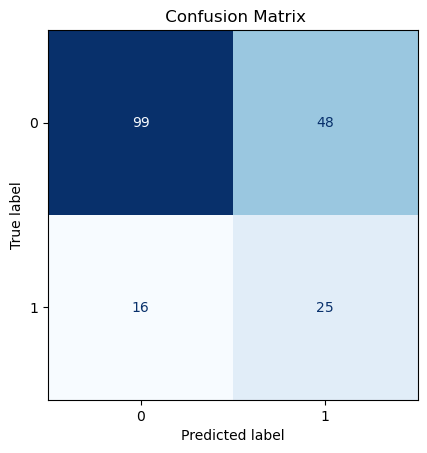

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title(" Confusion Matrix")
plt.grid(False)
plt.show()

## Hyperparameter tuning

In [65]:
'''Hyperparameters for Random Forest Classifier'''

# Number of trees in random forest
rf_n_estimators = [150, 200, 250]
# Number of features to consider at every split
rf_max_features = ['sqrt', 'log2', 0.8]
# Maximum number of levels in tree
rf_max_depth = [5, 10, 20, 30]
# Minimum number of samples required to split a node
rf_min_samples_split = [2, 5, 10, 20]
# Minimum number of samples required at each leaf node
rf_min_samples_leaf = [1, 3, 5, 7, 10]
# Method of selecting samples for training each tree
rf_bootstrap = [True]
# Handle imbalance
rf_class_weight = [None] # already did upsampling/downsampling earlier

# Combined
rf_hyperparameters = {
    'classifier__n_estimators': rf_n_estimators,
    'classifier__max_features': rf_max_features,
    'classifier__max_depth': rf_max_depth,
    'classifier__min_samples_split': rf_min_samples_split,
    'classifier__min_samples_leaf': rf_min_samples_leaf,
    'classifier__bootstrap': rf_bootstrap,
    'classifier__random_state': [42]
}

In [66]:
from sklearn.model_selection import KFold
cross_val_num = 5
cv = KFold(n_splits=cross_val_num, shuffle=True, random_state=42)
print(cv)

KFold(n_splits=5, random_state=42, shuffle=True)


In [67]:
random_hyperparameter_grid = [
    rf_hyperparameters
    # gb_hyperparameters,
    # xgb_hyperparameters
]

model_list = [
    RandomForestClassifier()
    # GradientBoostingClassifier(),
    # XGBClassifier()
]

In [68]:
from sklearn.model_selection import RandomizedSearchCV

randomsearch_best_models = {}

for model,param_grid in zip(model_list, random_hyperparameter_grid):
    name = type(model).__name__

    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])


    random_grid = RandomizedSearchCV(
            estimator=clf,
            param_distributions=param_grid,
            n_iter=100,
            scoring='f1',
            cv=cv,
            random_state=42,
            verbose=3,
            n_jobs=1 #  non-parallel processing
        )

    random_grid.fit(X_train, y_train)

    randomsearch_best_models[name] = {
        'best_params': random_grid.best_params_,
        'best_score': random_grid.best_score_,
        'best_estimator': random_grid.best_estimator_
    }

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=0.8, classifier__min_samples_leaf=7, classifier__min_samples_split=5, classifier__n_estimators=200, classifier__random_state=42;, score=0.876 total time=   2.7s
[CV 2/5] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=0.8, classifier__min_samples_leaf=7, classifier__min_samples_split=5, classifier__n_estimators=200, classifier__random_state=42;, score=0.868 total time=   3.9s
[CV 3/5] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=0.8, classifier__min_samples_leaf=7, classifier__min_samples_split=5, classifier__n_estimators=200, classifier__random_state=42;, score=0.886 total time=   2.6s
[CV 4/5] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=0.8, classifier__min_samples_leaf=7, classifier__min_samples_split=5, classifier__n_es

In [70]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report

randomsearchcv_model_results = {}

for model_name, model_data in randomsearch_best_models.items():
    best_pipeline = model_data['best_estimator']
    best_params = model_data['best_params']
    
    # Predict on validation set
    y_test_pred = best_pipeline.predict(X_test)
    y_test_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    report = classification_report(y_test, y_test_pred)

    randomsearchcv_model_results[model_name] = {
        'y_outputs':
        {'y_test': y_test,
         'y_test_pred': y_test_pred,
         'y_test_pred_proba': y_test_pred_proba},
        'metrics':
        {'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc},
        'report': report
    }
    print(f"\n=== {model_name} ===")
    pprint(best_params)
    print("\nMetrics:")
    pprint(randomsearchcv_model_results[model_name]['metrics'])
    print("\nClassification Report:", randomsearchcv_model_results[model_name]['report'])


=== RandomForestClassifier ===
{'classifier__bootstrap': True,
 'classifier__max_depth': 30,
 'classifier__max_features': 0.8,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 150,
 'classifier__random_state': 42}

Metrics:
{'accuracy': 0.8404255319148937,
 'f1_score': 0.6808510638297872,
 'precision': 0.6037735849056604,
 'recall': 0.7804878048780488,
 'roc_auc': 0.9246723079475694}

Classification Report:               precision    recall  f1-score   support

           0       0.93      0.86      0.89       147
           1       0.60      0.78      0.68        41

    accuracy                           0.84       188
   macro avg       0.77      0.82      0.79       188
weighted avg       0.86      0.84      0.85       188



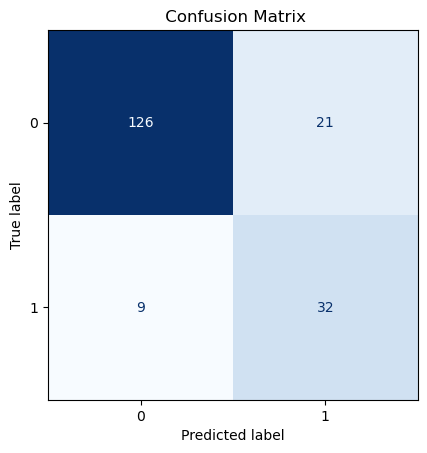

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in randomsearchcv_model_results.items():
    y_test = randomsearchcv_model_results[name]['y_outputs']['y_test']
    y_test_pred = randomsearchcv_model_results[name]['y_outputs']['y_test_pred']
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots()
    disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
    plt.title(" Confusion Matrix")
    plt.grid(False)
    plt.show()

# Try dropping age_group, using only older adults

In [74]:
# Filter only rows with 'older' in 'age_group'
mask = labeled_df['age_group'] == 'older'
labeled_df = labeled_df.loc[mask].copy()

# drop feature since all values are 'older'
labeled_df = labeled_df.drop(columns=['age_group'])

labeled_df = labeled_df.reset_index(drop=True)

## Pipeline and training on labelled set

In [75]:
labeled_df = labeled_df.drop(columns=['user_id'])

In [76]:
print(labeled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   activity_label                  272 non-null    object 
 1   acceleration_x_mean             272 non-null    float64
 2   acceleration_x_std              272 non-null    float64
 3   acceleration_y_mean             272 non-null    float64
 4   acceleration_y_std              272 non-null    float64
 5   acceleration_z_mean             272 non-null    float64
 6   acceleration_z_std              272 non-null    float64
 7   acceleration_roc_x_mean         272 non-null    float64
 8   acceleration_roc_x_std          272 non-null    float64
 9   acceleration_roc_y_mean         272 non-null    float64
 10  acceleration_roc_y_std          272 non-null    float64
 11  acceleration_roc_z_mean         272 non-null    float64
 12  acceleration_roc_z_std          272 

### Imputation by activity_label, health_status

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin

class GroupImputer(BaseEstimator, TransformerMixin):
    def __init__(self, group_cols, target_cols, strategy='mean'): # mean for numerical data
        self.group_cols = group_cols
        self.target_cols = target_cols
        self.strategy = strategy
        self.impute_values_ = None

    def fit(self, X, y=None):
        print("Fitting group imputer.")

        # If no target_cols passed, infer them
        if self.target_cols is None:
            self.target_cols = [
                col for col in X.columns
                if col not in self.group_cols and pd.api.types.is_numeric_dtype(X[col])
            ]
            
        self.impute_values_ = (
            X.groupby(self.group_cols)[self.target_cols]
              .agg(self.strategy)
              .reset_index()
        )
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.target_cols:
            merged = X_copy[self.group_cols].merge(
                self.impute_values_[[*self.group_cols, col]],
                on=self.group_cols,
                how="left"
            )[col]
            # First fill with group mean
            X_copy[col] = X_copy[col].fillna(merged)
            # Then fallback to global mean if still NaN
            if X_copy[col].isna().any():
                X_copy[col] = X_copy[col].fillna(X_copy[col].mean())
        return X_copy
    
    def get_feature_names_out(self, input_features=None):
        return input_features


In [79]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


# Nominal features to be one-hot encoded
# If activity labels are limited: ['Eat' 'Climbing stairs' 'Fall' 'Run' 'Other exercise' 'Sleep' 'Sitting down' 'Walk']
nominal_cols_encode = ['activity_label'] #,'age_group']

# Numerical features to be imputed and scaled
numerical_cols_impute_scale = ['heart_rate_x_std', 'heart_rate_roc_x_std']
numerical_cols_scale = labeled_df.select_dtypes(include='number').drop(columns=numerical_cols_impute_scale).columns.tolist()

nominal_onehot_pipe = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_impute_scale_pipe = Pipeline([
    ("group_imputer", GroupImputer(
        group_cols=["activity_label"],   # grouping columns
        target_cols=None,  # columns to impute - impute all
        strategy="mean"   # strategy: mean for numeric
    )),
    ("drop_activity_label", FunctionTransformer(lambda df: df.drop(columns=["activity_label"]), validate=False)),
    ('scaler', StandardScaler())
    
])

numerical_scale_pipe = Pipeline([
    ('scaler', StandardScaler())
    
])

print(nominal_cols_encode)
print(numerical_cols_impute_scale)
print(numerical_cols_scale)
print(len(nominal_cols_encode)+len(numerical_cols_impute_scale)+len(numerical_cols_scale))

['activity_label']
['heart_rate_x_std', 'heart_rate_roc_x_std']
['acceleration_x_mean', 'acceleration_x_std', 'acceleration_y_mean', 'acceleration_y_std', 'acceleration_z_mean', 'acceleration_z_std', 'acceleration_roc_x_mean', 'acceleration_roc_x_std', 'acceleration_roc_y_mean', 'acceleration_roc_y_std', 'acceleration_roc_z_mean', 'acceleration_roc_z_std', 'acceleration_vec_sum_mean', 'acceleration_vec_sum_std', 'user_acceleration_x_mean', 'user_acceleration_x_std', 'user_acceleration_y_mean', 'user_acceleration_y_std', 'user_acceleration_z_mean', 'user_acceleration_z_std', 'user_acceleration_roc_x_mean', 'user_acceleration_roc_x_std', 'user_acceleration_roc_y_mean', 'user_acceleration_roc_y_std', 'user_acceleration_roc_z_mean', 'user_acceleration_roc_z_std', 'user_acceleration_vec_sum_mean', 'user_acceleration_vec_sum_std', 'rotation_rate_x_mean', 'rotation_rate_x_std', 'rotation_rate_y_mean', 'rotation_rate_y_std', 'rotation_rate_z_mean', 'rotation_rate_z_std', 'rotation_rate_roc_x_m

In [80]:
# Check the distribution of the target column
print(labeled_df['health_status'].value_counts())

health_status
Healthy      203
Unhealthy     69
Name: count, dtype: int64


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# X = labeled_df[common_features].dropna()
X = labeled_df.drop(columns=['health_status'])
y = labeled_df['health_status']  # 1=healthy, 0=unhealthy

# Split the data into training and test sets, ensuring stratification
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# y_train = y_train.map({'Healthy': 0, 'Unhealthy': 1})
# y_test = y_test.map({'Healthy': 0, 'Unhealthy': 1})

# -----------------
# Imbalanced data:
# -----------------
# Split the data into training and test sets, ensuring stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Split the test-validation set (20%) into validation (10%) and test (10%) sets
# X_val, X_test, y_val, y_test = train_test_split(X_testval, y_testval, test_size=0.5, random_state=42, stratify=y_testval)

y_train = y_train.map({'Healthy': 0, 'Unhealthy': 1})
# y_val = y_val.map({'Healthy': 0, 'Unhealthy': 1})
y_test = y_test.map({'Healthy': 0, 'Unhealthy': 1})

# Combine training features and target for resampling
train_df = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes in the training set only
train_majority = train_df[train_df.health_status == 0]
train_minority = train_df[train_df.health_status == 1]

len_maj = len(train_majority)
len_min = len(train_minority)
n_samples_each = round((len_maj+len_min)/2)
print(n_samples_each)

# Upsample minority class in the training set
train_minority_upsampled = resample(train_minority, 
                                    replace=True,    # sample with replacement
                                    n_samples=n_samples_each,  # number of samples in upsampled minority class (reduced due to resource constraints)
                                    random_state=42) # reproducible results

# Downsample majority class in the training set
train_majority_downsampled = resample(train_majority, 
                                      replace=False,    # sample without replacement
                                      n_samples=n_samples_each,   # number of samples in downsampled majority class (reduced due to resource constraints)
                                      random_state=42)  # reproducible results

# Combine upsampled minority class with downsampled majority class
train_combined = pd.concat([train_majority_downsampled, train_minority_upsampled])

# Shuffle and reset index
train_combined = train_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Re-separate the features and target in the combined training set
X_train = train_combined.drop(columns='health_status')
y_train = train_combined['health_status']

print(y_test.value_counts())
print(y_train.value_counts())
print(X_train.info())

108
health_status
0    41
1    14
Name: count, dtype: int64
health_status
1    108
0    108
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   activity_label                  216 non-null    object 
 1   acceleration_x_mean             216 non-null    float64
 2   acceleration_x_std              216 non-null    float64
 3   acceleration_y_mean             216 non-null    float64
 4   acceleration_y_std              216 non-null    float64
 5   acceleration_z_mean             216 non-null    float64
 6   acceleration_z_std              216 non-null    float64
 7   acceleration_roc_x_mean         216 non-null    float64
 8   acceleration_roc_x_std          216 non-null    float64
 9   acceleration_roc_y_mean         216 non-null    float64
 10  acceleration_roc_y_std          216 non-

In [82]:
print(labeled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   activity_label                  272 non-null    object 
 1   acceleration_x_mean             272 non-null    float64
 2   acceleration_x_std              272 non-null    float64
 3   acceleration_y_mean             272 non-null    float64
 4   acceleration_y_std              272 non-null    float64
 5   acceleration_z_mean             272 non-null    float64
 6   acceleration_z_std              272 non-null    float64
 7   acceleration_roc_x_mean         272 non-null    float64
 8   acceleration_roc_x_std          272 non-null    float64
 9   acceleration_roc_y_mean         272 non-null    float64
 10  acceleration_roc_y_std          272 non-null    float64
 11  acceleration_roc_z_mean         272 non-null    float64
 12  acceleration_roc_z_std          272 

In [83]:
# Detecting missing values
missing_list = list(X_train.columns[X_train.isna().any()])       

# Percentage of missing values
row_count = X_train.shape[0] 
# Create list of dicts (one per column)
data = []
for col in missing_list:
    count = X_train[col].isnull().sum()
    percent = (count / row_count) * 100
    data.append({
        'Columns with missing values': col,
        'Missing count': count,
        'Missing %': percent,
        'DataType' : X_train[col].dtype
    })

# Create DataFrame from list of dicts
missing_df = pd.DataFrame(data)
print(missing_df)

  Columns with missing values  Missing count  Missing % DataType
0            heart_rate_x_std              6   2.777778  float64
1        heart_rate_roc_x_std              6   2.777778  float64


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model  import LogisticRegression
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('nominal_encode', nominal_onehot_pipe, nominal_cols_encode),
        ('num_impute_scale', numerical_impute_scale_pipe, numerical_cols_impute_scale + ['activity_label']),
        ('num_scale', numerical_scale_pipe, numerical_cols_scale)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
    n_jobs=-1
    )

clf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42))
])

# X_train["activity_label"] = X_train["activity_label"].astype(str)
# X_test["activity_label"] = X_test["activity_label"].astype(str)

# imp = numerical_impute_scale_pipe.named_steps["group_imputer"]
# imp.fit(X_train[numerical_cols_impute_scale + ["activity_label"]])
# print("Target cols to impute:", imp.target_cols)
# print(imp.impute_values_.head())


clf.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('nominal_encode', ...), ('num_impute_scale', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False


In [85]:
# predict on logistic regression
y_test_pred = clf.predict(X_test)
y_test_pred_proba = clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
report = classification_report(y_test, y_test_pred)

print(f'Accuracy: {accuracy}\n')
print(f'Precision: {precision}\n')
print(f'Recall: {recall}\n')
print(f'F1 score: {f1}\n')
print(f'roc_auc: {roc_auc}\n')
print(f'report: {report}\n')

Accuracy: 0.6181818181818182

Precision: 0.29411764705882354

Recall: 0.35714285714285715

F1 score: 0.3225806451612903

roc_auc: 0.6149825783972125

report:               precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.29      0.36      0.32        14

    accuracy                           0.62        55
   macro avg       0.53      0.53      0.53        55
weighted avg       0.64      0.62      0.63        55




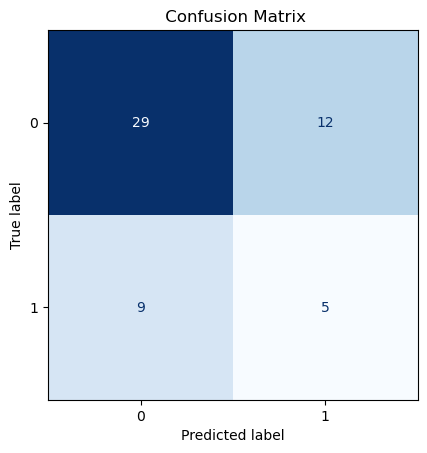

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
plt.title(" Confusion Matrix")
plt.grid(False)
plt.show()

## Hyperparameter tuning

In [87]:
'''Hyperparameters for Random Forest Classifier'''

# Number of trees in random forest
rf_n_estimators = [150, 200, 250]
# Number of features to consider at every split
rf_max_features = ['sqrt', 'log2', 0.8]
# Maximum number of levels in tree
rf_max_depth = [5, 10, 20, 30]
# Minimum number of samples required to split a node
rf_min_samples_split = [2, 5, 10, 20]
# Minimum number of samples required at each leaf node
rf_min_samples_leaf = [1, 3, 5, 7, 10]
# Method of selecting samples for training each tree
rf_bootstrap = [True]
# Handle imbalance
rf_class_weight = [None] # already did upsampling/downsampling earlier

# Combined
rf_hyperparameters = {
    'classifier__n_estimators': rf_n_estimators,
    'classifier__max_features': rf_max_features,
    'classifier__max_depth': rf_max_depth,
    'classifier__min_samples_split': rf_min_samples_split,
    'classifier__min_samples_leaf': rf_min_samples_leaf,
    'classifier__bootstrap': rf_bootstrap,
    'classifier__random_state': [42]
}

In [88]:
from sklearn.model_selection import KFold
cross_val_num = 5
cv = KFold(n_splits=cross_val_num, shuffle=True, random_state=42)
print(cv)

KFold(n_splits=5, random_state=42, shuffle=True)


In [89]:
random_hyperparameter_grid = [
    rf_hyperparameters
    # gb_hyperparameters,
    # xgb_hyperparameters
]

model_list = [
    RandomForestClassifier()
    # GradientBoostingClassifier(),
    # XGBClassifier()
]

In [90]:
from sklearn.model_selection import RandomizedSearchCV

randomsearch_best_models = {}

for model,param_grid in zip(model_list, random_hyperparameter_grid):
    name = type(model).__name__

    clf = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])


    random_grid = RandomizedSearchCV(
            estimator=clf,
            param_distributions=param_grid,
            n_iter=100,
            scoring='f1',
            cv=cv,
            random_state=42,
            verbose=3,
            n_jobs=1 #  non-parallel processing
        )

    random_grid.fit(X_train, y_train)

    randomsearch_best_models[name] = {
        'best_params': random_grid.best_params_,
        'best_score': random_grid.best_score_,
        'best_estimator': random_grid.best_estimator_
    }

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=0.8, classifier__min_samples_leaf=7, classifier__min_samples_split=5, classifier__n_estimators=200, classifier__random_state=42;, score=0.760 total time=   2.6s
[CV 2/5] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=0.8, classifier__min_samples_leaf=7, classifier__min_samples_split=5, classifier__n_estimators=200, classifier__random_state=42;, score=0.818 total time=   2.6s
[CV 3/5] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=0.8, classifier__min_samples_leaf=7, classifier__min_samples_split=5, classifier__n_estimators=200, classifier__random_state=42;, score=0.851 total time=   0.3s
[CV 4/5] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=0.8, classifier__min_samples_leaf=7, classifier__min_samples_split=5, classifier__n_es

In [91]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import classification_report

randomsearchcv_model_results = {}

for model_name, model_data in randomsearch_best_models.items():
    best_pipeline = model_data['best_estimator']
    best_params = model_data['best_params']
    
    # Predict on validation set
    y_test_pred = best_pipeline.predict(X_test)
    y_test_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    report = classification_report(y_test, y_test_pred)

    randomsearchcv_model_results[model_name] = {
        'y_outputs':
        {'y_test': y_test,
         'y_test_pred': y_test_pred,
         'y_test_pred_proba': y_test_pred_proba},
        'metrics':
        {'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc},
        'report': report
    }
    print(f"\n=== {model_name} ===")
    pprint(best_params)
    print("\nMetrics:")
    pprint(randomsearchcv_model_results[model_name]['metrics'])
    print("\nClassification Report:", randomsearchcv_model_results[model_name]['report'])


=== RandomForestClassifier ===
{'classifier__bootstrap': True,
 'classifier__max_depth': 30,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 10,
 'classifier__n_estimators': 250,
 'classifier__random_state': 42}

Metrics:
{'accuracy': 0.7272727272727273,
 'f1_score': 0.21052631578947367,
 'precision': 0.4,
 'recall': 0.14285714285714285,
 'roc_auc': 0.5871080139372822}

Classification Report:               precision    recall  f1-score   support

           0       0.76      0.93      0.84        41
           1       0.40      0.14      0.21        14

    accuracy                           0.73        55
   macro avg       0.58      0.53      0.52        55
weighted avg       0.67      0.73      0.68        55



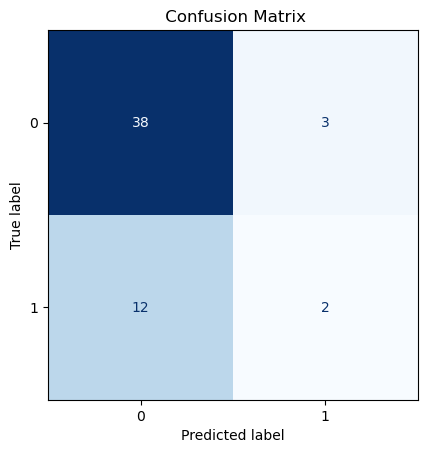

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in randomsearchcv_model_results.items():
    y_test = randomsearchcv_model_results[name]['y_outputs']['y_test']
    y_test_pred = randomsearchcv_model_results[name]['y_outputs']['y_test_pred']
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots()
    disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
    plt.title(" Confusion Matrix")
    plt.grid(False)
    plt.show()

# Unlabelled set

In [3]:
target_df = pd.read_csv("./combined_c18.csv")
print(target_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21922353 entries, 0 to 21922352
Data columns (total 42 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   stamp_start                        object 
 1   stamp_end                          object 
 2   yaw_mean                           float64
 3   pitch_mean                         float64
 4   roll_mean                          float64
 5   rotation_rate_x_mean               float64
 6   rotation_rate_y_mean               float64
 7   rotation_rate_z_mean               float64
 8   user_acceleration_x_mean           float64
 9   user_acceleration_y_mean           float64
 10  user_acceleration_z_mean           float64
 11  yaw_std                            float64
 12  pitch_std                          float64
 13  roll_std                           float64
 14  rotation_rate_x_std                float64
 15  rotation_rate_y_std                float64
 16  rotation_rate_z_

### Drop missing rows from unlabelled set

In [ ]:
# Detecting missing values
missing_list = list(target_df.columns[target_df.isna().any()])       

# Percentage of missing values
row_count = target_df.shape[0] 
# Create list of dicts (one per column)
data = []
for col in missing_list:
    count = target_df[col].isnull().sum()
    percent = (count / row_count) * 100
    data.append({
        'Columns with missing values': col,
        'Missing count': count,
        'Missing %': percent,
        'DataType' : target_df[col].dtype
    })

# Create DataFrame from list of dicts
missing_df = pd.DataFrame(data)
print(missing_df)

   Columns with missing values  Missing count  Missing % DataType
0                      yaw_std             25   0.000114  float64
1                    pitch_std             25   0.000114  float64
2                     roll_std             25   0.000114  float64
3          rotation_rate_x_std             25   0.000114  float64
4          rotation_rate_y_std             25   0.000114  float64
5          rotation_rate_z_std             25   0.000114  float64
6      user_acceleration_x_std             25   0.000114  float64
7      user_acceleration_y_std             25   0.000114  float64
8      user_acceleration_z_std             25   0.000114  float64
9       rotation_magnitude_std             25   0.000114  float64
10  acceleration_magnitude_std             25   0.000114  float64


In [ ]:
# looks like 0.04% of dryad dataset have missing values, just drop because we have a lot of data
target_df = target_df.dropna()

In [ ]:
# Detecting missing values
missing_list = list(target_df.columns[target_df.isna().any()])       

print(missing_list)

[]


### Drop certain features from labelled set and unlabelled set

In [ ]:
# Drop acceleration and magnetometer as these are not in dryad dataset
# Drop yaw pitch roll as these are not in ADLfalls

# keywords of columns to drop
drop_kw = ['yaw','pitch','roll','magnetometer']
columns_to_drop = [col for col in target_df.columns if any(k in col.lower() for k in drop_kw)]
columns_to_drop2 = [col for col in labeled_df.columns if any(k in col.lower() for k in drop_kw)]

drop_cols = ['acceleration_x_mean','acceleration_x_std',
             'acceleration_y_mean','acceleration_y_std',
             'acceleration_z_mean','acceleration_z_std'
            ] + columns_to_drop2

target_df = target_df.drop(columns=columns_to_drop)
labeled_df = labeled_df.drop(columns=drop_cols)


# Predict labels for unlabelled set

In [ ]:
X_target = target_df[common_features].dropna()
predicted_health = clf.predict(X_target)
predicted_proba = clf.predict_proba(X_target)[:, 1]  # probability of healthy

target_df['predicted_health'] = predicted_health
target_df['predicted_health_prob'] = predicted_proba
